# Sentiment Analysis

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [16]:
import pandas as pd

data = pd.read_pickle('pickle/corpus_AnnualR.pkl')
data.head()

,report,company_name
ABN_AMRO_Group_(2018),babn amro bank nvabn amro group nv annual repo...,ABN_AMRO_Group_(2018)
AGNC_Investment_(2018).pdf,bproviding private capital to the us housing m...,AGNC_Investment_(2018).pdf
Acer_(2018).pdf,bacer annual reportnnpublication date april ...,Acer_(2018).pdf
Autohome_(2018).pdf,btable of contentsnn n nn nn nnunited statesnn...,Autohome_(2018).pdf
BAIC_Motor_Corporation_(2018).pdf,ba joint stock company incorporated in the re...,BAIC_Motor_Corporation_(2018).pdf


In [17]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['report'].apply(pol)
data['subjectivity'] = data['report'].apply(sub)

In [18]:
data.head()

,report,company_name,polarity,subjectivity
ABN_AMRO_Group_(2018),babn amro bank nvabn amro group nv annual repo...,ABN_AMRO_Group_(2018),0.065081,0.338154
AGNC_Investment_(2018).pdf,bproviding private capital to the us housing m...,AGNC_Investment_(2018).pdf,0.063541,0.385070
Acer_(2018).pdf,bacer annual reportnnpublication date april ...,Acer_(2018).pdf,0.087779,0.330964
Autohome_(2018).pdf,btable of contentsnn n nn nn nnunited statesnn...,Autohome_(2018).pdf,0.056296,0.399222
BAIC_Motor_Corporation_(2018).pdf,ba joint stock company incorporated in the re...,BAIC_Motor_Corporation_(2018).pdf,0.059765,0.329441


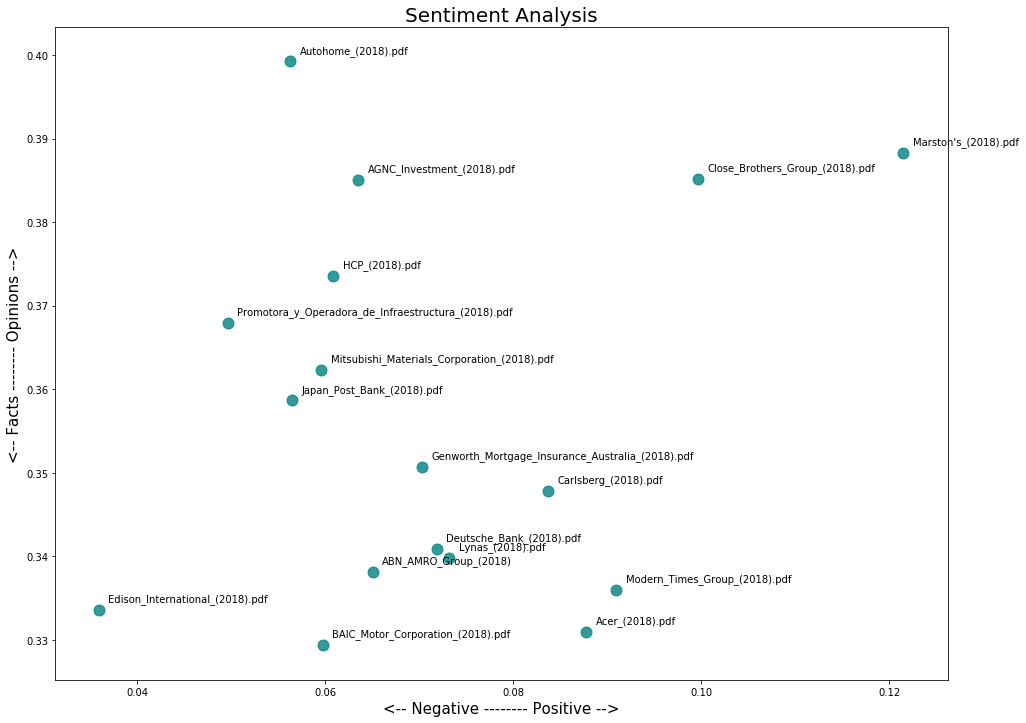

In [27]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 12]

for index, company in enumerate(data.index):
    x = data.polarity.loc[company]
    y = data.subjectivity.loc[company]
    plt.scatter(x, y, color='#008080', s=120, alpha=.8)
    plt.text(x+.001, y+.001, data['company_name'][index], fontsize=10)
    #plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Document Sections

In [42]:
# Split each documents into 20 parts
import numpy as np
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [43]:
data.head()

,report,company_name,polarity,subjectivity
ABN_AMRO_Group_(2018),babn amro bank nvabn amro group nv annual repo...,ABN_AMRO_Group_(2018),0.065081,0.338154
AGNC_Investment_(2018).pdf,bproviding private capital to the us housing m...,AGNC_Investment_(2018).pdf,0.063541,0.385070
Acer_(2018).pdf,bacer annual reportnnpublication date april ...,Acer_(2018).pdf,0.087779,0.330964
Autohome_(2018).pdf,btable of contentsnn n nn nn nnunited statesnn...,Autohome_(2018).pdf,0.056296,0.399222
BAIC_Motor_Corporation_(2018).pdf,ba joint stock company incorporated in the re...,BAIC_Motor_Corporation_(2018).pdf,0.059765,0.329441


In [44]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.report:
    split = split_text(t)
    list_pieces.append(split)   
#list_pieces

In [45]:
# The list has 10 elements, one for each transcript
len(list_pieces)

17

In [46]:
# Calculate the polarity for each piece of text
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)   
#polarity_transcript

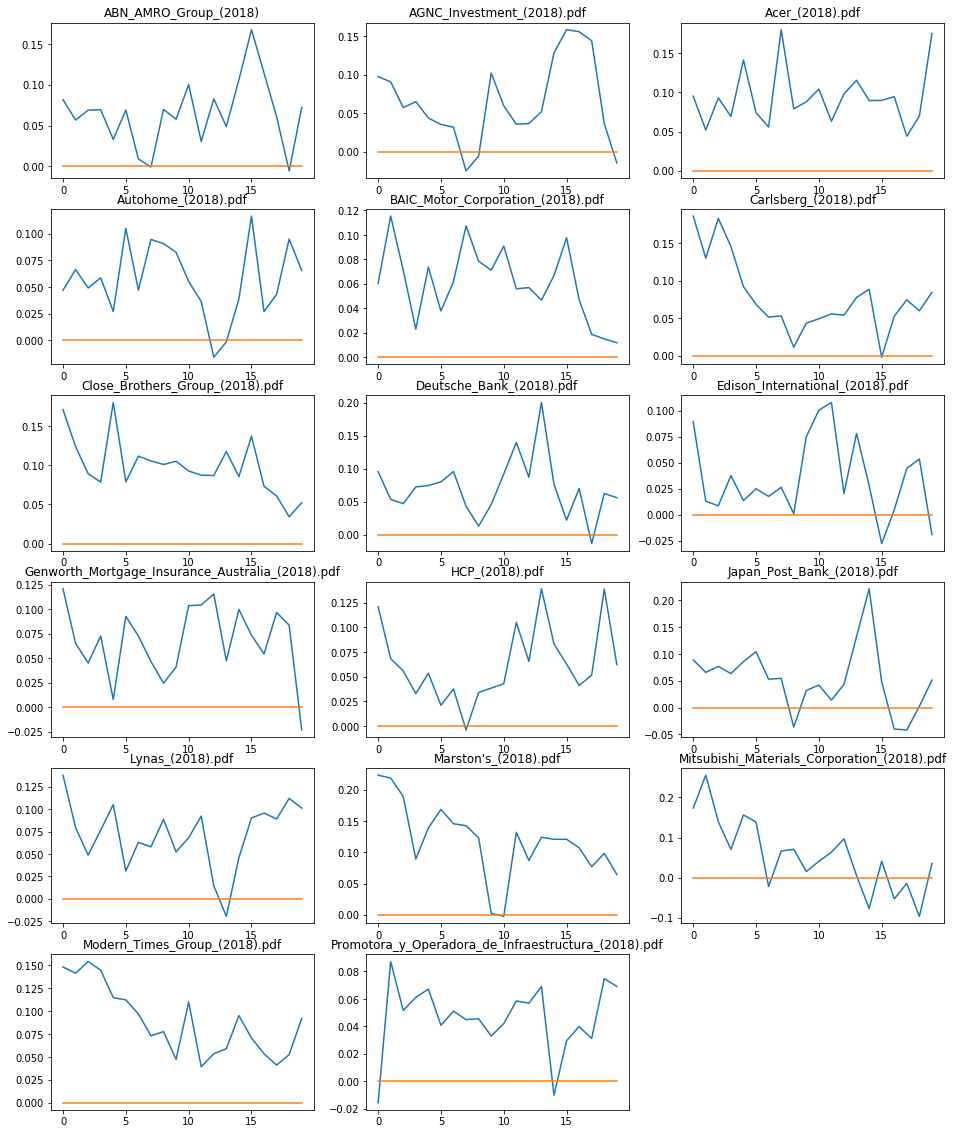

In [50]:
# Show the plot for all companies
plt.rcParams['figure.figsize'] = [16, 20]

for index, company in enumerate(data.index):    
    plt.subplot(6, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(data['company_name'][index])
#    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()